# TP3


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

## Exercice 3


### Q.1 : Créer la matrice


In [2]:
# Paramètres
n = 100  # nombre de réalisations
D = 2  # dimension

# Générer une matrice aléatoire n x D avec des valeurs uniformément distribuées
matrix = np.random.rand(n, D)

# Afficher un extrait de la matrice
matrix[:5]  # 5 premières lignes

array([[0.39962582, 0.46275106],
       [0.23088203, 0.55056954],
       [0.49311466, 0.94705546],
       [0.85170815, 0.97126274],
       [0.49084546, 0.20652587]])

### Q.2 : Calculer la norme


In [3]:
# Calculer la norme euclidienne de chaque observation (chaque ligne)
norms = np.linalg.norm(matrix, axis=1)

# Afficher les premières normes pour vérifier
norms[:5]

array([0.61142403, 0.59702037, 1.06774347, 1.29180419, 0.53252436])

### Q.3 : Créer les graphiques


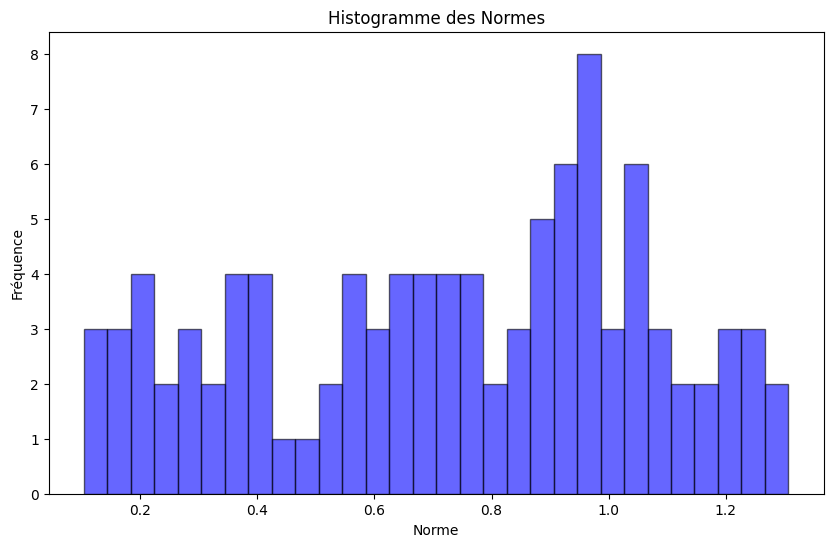

In [4]:
# Créer un histogramme
plt.figure(figsize=(10, 6))
plt.hist(norms, bins=30, alpha=0.6, color="b", edgecolor="black")
plt.title("Histogramme des Normes")
plt.xlabel("Norme")
plt.ylabel("Fréquence")
plt.show()

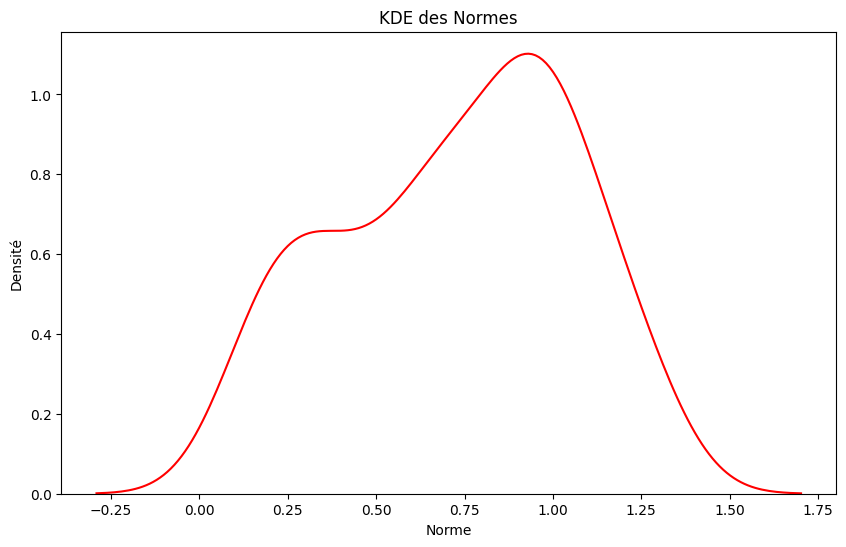

In [5]:
# Créer une KDE (estimation par noyau)
plt.figure(figsize=(10, 6))
sns.kdeplot(norms, color="r")
plt.title("KDE des Normes")
plt.xlabel("Norme")
plt.ylabel("Densité")
plt.show()

### Q.4 : Hausse des dimensions


In [6]:
# Paramètres
n = 10**5  # nombre de réalisations
dimensions = [2, 5, 10, 20, 50, 100]  # dimensions à tester

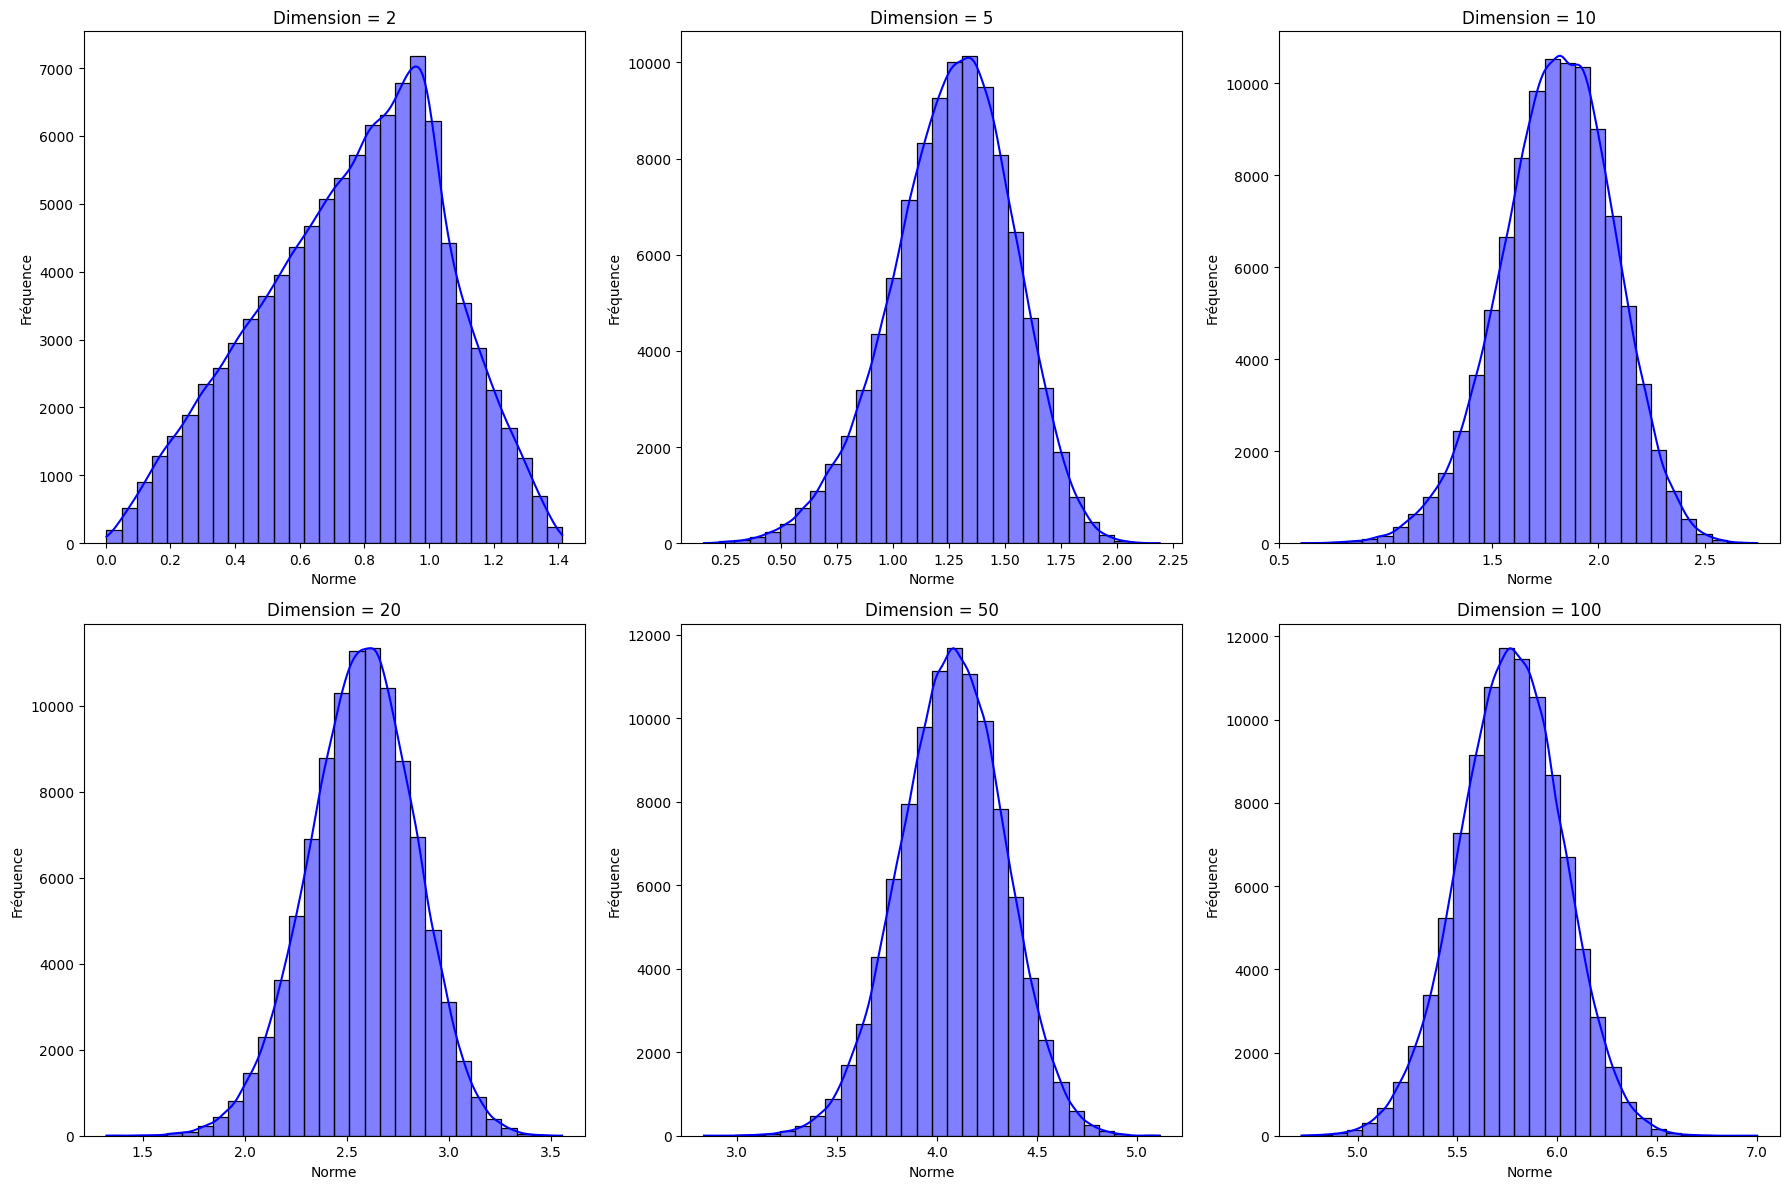

In [7]:
# Créer une figure avec 2 lignes et 3 colonnes
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Pour facilement itérer sur chaque sous-graphe

# Boucle sur les différentes dimensions
for i, D in enumerate(dimensions):
    # Générer une matrice aléatoire n x D
    matrix = np.random.rand(n, D)

    # Calculer la norme euclidienne de chaque observation
    norms = np.linalg.norm(matrix, axis=1)

    # Tracer l'histogramme et KDE dans le sous-graphe correspondant
    sns.histplot(norms, bins=30, kde=True, ax=axes[i], color="b", edgecolor="black")
    axes[i].set_title(f"Dimension = {D}")
    axes[i].set_xlabel("Norme")
    axes[i].set_ylabel("Fréquence")

# Ajuster l'espacement des sous-graphiques
plt.tight_layout()

# Sauvegarder l'image avec tous les graphiques
plt.savefig("resultats/normes.png")
plt.show()

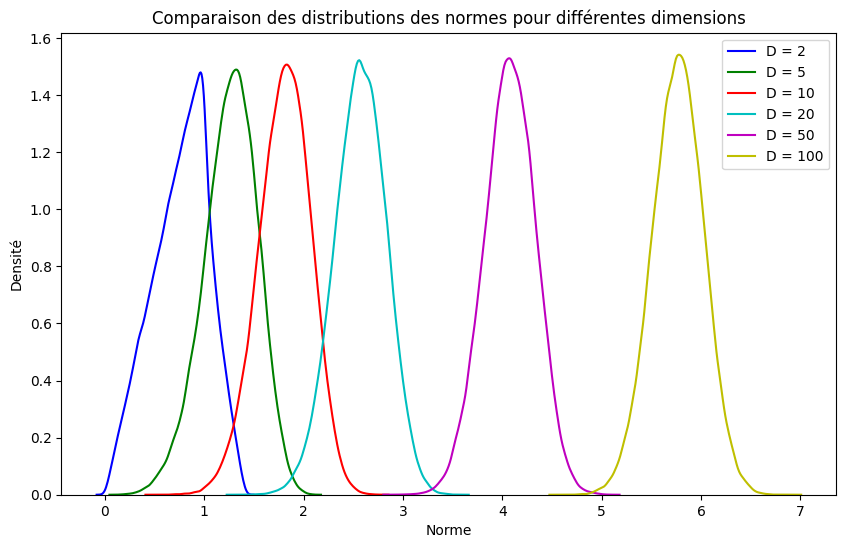

In [8]:
# Créer une figure
plt.figure(figsize=(10, 6))
colors = ["b", "g", "r", "c", "m", "y"]  # couleurs pour chaque dimension

# Boucle sur les différentes dimensions pour tracer la KDE de chaque dimension
for i, D in enumerate(dimensions):
    # Générer une matrice aléatoire n x D
    matrix = np.random.rand(n, D)

    # Calculer la norme euclidienne de chaque observation
    norms = np.linalg.norm(matrix, axis=1)

    # Tracer la KDE pour chaque dimension avec une couleur différente
    sns.kdeplot(norms, color=colors[i], label=f"D = {D}")

# Ajouter le titre et les légendes
plt.title("Comparaison des distributions des normes pour différentes dimensions")
plt.xlabel("Norme")
plt.ylabel("Densité")
plt.legend()

# Afficher le graphique
plt.savefig("resultats/comparaison_normes.png")
plt.show()

### Q.5 : Comment la répartition des normes évolue-t-elle avec l'incrément de D ?

À mesure que la dimension D augmente, on observe un décalage dans la répartition des normes. Pour des petites dimensions, les normes sont concentrées plus près de l'origine avec une dispersion plus large. Cependant, lorsque D augmente, les normes deviennent plus concentrées autour d'une moyenne plus élevée, et la dispersion diminue. Dans les dimensions plus élevées, les vecteurs aléatoires ont tendance à avoir une longueur plus stable, et les normes se concentrent autour de la racine carrée de la dimension D. Ainsi, la distance moyenne entre les points augmente avec D.


## Exercice 5


### Etape 1


In [9]:
# Coordonnées des 10 sensors
sensors = np.array(
    [
        [0.026, 0.241, 0.026],
        [0.236, 0.193, -0.913],
        [-0.653, 0.969, -0.700],
        [0.310, 0.094, 0.876],
        [0.507, 0.756, 0.216],
        [-0.270, -0.978, -0.739],
        [-0.466, -0.574, 0.556],
        [-0.140, -0.502, -0.155],
        [0.353, -0.281, 0.431],
        [-0.473, 0.993, 0.411],
    ]
)


# Fonction pour générer les données
def generateData(n):
    """
    Génère un jeu de données de taille n selon le modèle 3-sensor.
    Chaque point est représenté par ses distances aux 10 capteurs.
    """
    # Générer n points dans le cube unité [-1, 1]^3
    points = np.random.uniform(low=-1, high=1, size=(n, 3))

    # Calculer les distances aux capteurs
    distances = np.zeros((n, len(sensors)))

    for i, point in enumerate(points):
        distances[i] = np.linalg.norm(sensors - point, axis=1)  # Distances aux capteurs

    return distances


# Générer les trois jeux de données
data_100 = generateData(100)
data_1000 = generateData(1000)
data_10000 = generateData(10000)

# Affichage pour vérifier
print(f"Jeu de données 100: {data_100.shape}")
print(f"Jeu de données 1000: {data_1000.shape}")
print(f"Jeu de données 10000: {data_10000.shape}")

Jeu de données 100: (100, 10)
Jeu de données 1000: (1000, 10)
Jeu de données 10000: (10000, 10)


In [10]:
def perform_pca(data, n_components=10):
    """
    Effectue l'ACP et retourne les variances expliquées.
    """
    pca = PCA(n_components=n_components)
    pca.fit(data)
    return pca.explained_variance_ratio_


# Réaliser l'ACP sur les trois jeux de données
variance_100 = perform_pca(data_100)
variance_1000 = perform_pca(data_1000)
variance_10000 = perform_pca(data_10000)

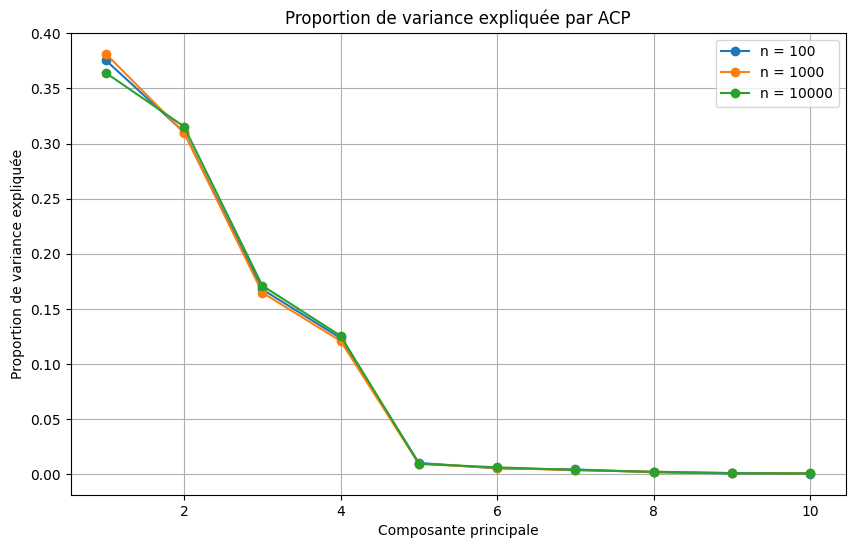

In [11]:
# Tracer les variances expliquées pour chaque taille de données
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), variance_100, marker="o", label="n = 100")
plt.plot(range(1, 11), variance_1000, marker="o", label="n = 1000")
plt.plot(range(1, 11), variance_10000, marker="o", label="n = 10000")
plt.title("Proportion de variance expliquée par ACP")
plt.xlabel("Composante principale")
plt.ylabel("Proportion de variance expliquée")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
def correlation_dimension(data):
    """
    Calcule l'estimation de la dimension intrinsèque basée sur la corrélation des distances.
    """
    # Calculer la matrice des distances entre les points
    distances = squareform(pdist(data))  # Calcul des distances entre tous les points
    
    # On calcule la distance maximale et minimale
    d_min = np.min(distances[distances > 0])  # Éviter les 0 (distances à soi-même)
    d_max = np.max(distances)
    
    # Créer une grille de distances log-échelonnées
    n_bins = 100
    bins = np.logspace(np.log10(d_min), np.log10(d_max), n_bins)
    
    # Compter le nombre de distances dans chaque intervalle
    counts = np.zeros(n_bins - 1)
    for i in range(n_bins - 1):
        counts[i] = np.sum((distances >= bins[i]) & (distances < bins[i+1]))
    
    # Estimation de la dimensionnalité par corrélation
    log_counts = np.log(counts[counts > 0])  # Éliminer les zéros
    log_bins = np.log(bins[1:len(log_counts)+1])  # Correspond aux bins utilisés
    
    # Régression linéaire pour estimer la dimension
    slope, _ = np.polyfit(log_bins, log_counts, 1)
    
    return slope

# Tester avec les données générées
dim_est_100 = correlation_dimension(data_100)
dim_est_1000 = correlation_dimension(data_1000)
dim_est_10000 = correlation_dimension(data_10000)

# Afficher les résultats
print(f"Estimation de la dimension intrinsèque pour n = 100: {dim_est_100}")
print(f"Estimation de la dimension intrinsèque pour n = 1000: {dim_est_1000}")
print(f"Estimation de la dimension intrinsèque pour n = 10000: {dim_est_10000}")

Estimation de la dimension intrinsèque pour n = 100: 1.9590364021326008
Estimation de la dimension intrinsèque pour n = 1000: 2.359096092808615
Estimation de la dimension intrinsèque pour n = 10000: 2.602250237778587
